## Grid refinement study for the flow around an obstacle

In [1]:
import torch

import lettuce as lt
from matplotlib import pyplot as plt

In [2]:
def run(ny=64, *axes):
    context = lt.Context(torch.device("cuda:0"))
    flow = lt.Obstacle(
        context=context, resolution=[2 * ny, ny], reynolds_number=50.0,
        mach_number=0.05, domain_length_x=10.1, stencil=lt.D2Q9()
    )
    x, y = flow.grid
    flow.mask = ((x >= 2) & (x < 3) & (y >= x) & (y <= 3))
    axes[0].imshow(flow.mask.T, origin="lower")

    tau = flow.units.relaxation_parameter_lu
    sim = lt.Simulation(flow, lt.BGKCollision(tau), boundaries=[], reporter=[])
    sim(ny * 100)
    u = flow.u_pu.cpu().numpy()
    print("Max Velocity:", u.max())
    return axes[1].imshow(u[0, ...].T, origin="lower")

In [3]:
def run_and_plot(n):
    fig, axes = plt.subplots(1, 2, figsize=(10, 3))
    fig.subplots_adjust(right=0.85)
    im2 = run(n, *axes)
    cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
    fig.colorbar(im2, cax=cbar_ax)

Max Velocity: 0.0008333333333333283


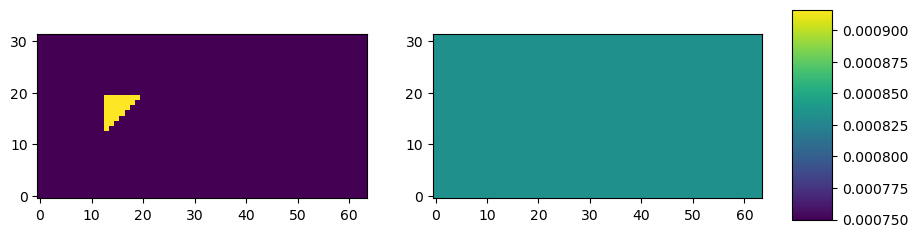

In [4]:
run_and_plot(32)

Max Velocity: 0.0008333333333333284


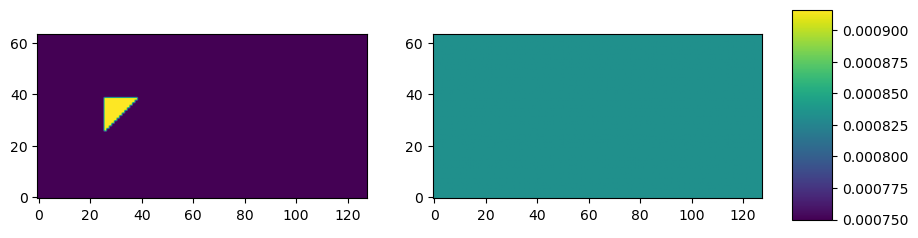

In [5]:
run_and_plot(64)

Max Velocity: 0.0008333333333333281


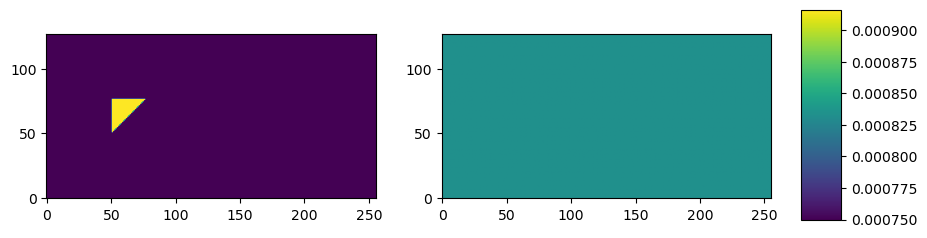

In [6]:
run_and_plot(128)